In [1]:
# Начал анализ с выявления сообществ, вывел в терминал в читабельном виде

import matplotlib.pyplot as plt
%matplotlib inline
from neo4j import GraphDatabase
from collections import Counter
import community
import networkx
import pandas
import json

uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "11111111"))

query = """
MATCH (p:Participant)-[:PARTICIPATED_IN]->(e:Event)
RETURN p.fio as participant, e.id_sobytiya as event
"""
with driver.session() as session:
    results = session.run(query)
    data = pandas.DataFrame([r.values() for r in results], columns=results.keys())
    
graph = networkx.from_pandas_edgelist(data, "participant", "event")

result = community.best_partition(graph)
print(json.dumps(result, ensure_ascii=False, indent=4))


{
    "Галчевская Карина Владимировна": 0,
    "189": 0,
    "Белоновская Анастасия Семеновна": 0,
    "Офицеров Олег Романович": 1,
    "206": 1,
    "Сапожник Борис Валерьевич": 1,
    "Жандарова Лариса Германовна": 2,
    "445": 2,
    "Чемодуров Дамир Русланович": 2,
    "Масимова Яна Дамировна": 3,
    "503": 3,
    "Мингажетдинов Рамиль Семенович": 3,
    "Мухтарова Алена Яковлевна": 4,
    "571": 4,
    "Щербатенко Ольга Робертовна": 4,
    "Русских Кира Константиновна": 5,
    "595": 5,
    "Федутинов Артем Артурович": 5,
    "Федонкина Кристина Маратовна": 6,
    "637": 6,
    "Маргиев Григорий Иванович": 6,
    "Чернолусская Екатерина Марселевна": 7,
    "741": 7,
    "Бухановская Лидия Радиковна": 7,
    "Оранский Владимир Артурович": 8,
    "996": 8,
    "Скотников Виктор Ильич": 8,
    "Ардатов Андрей Анатольевич": 9,
    "1210": 9,
    "Ханыгин Дмитрий Юрьевич": 9,
    "Рифтин Кирилл Анатольевич": 10,
    "1392": 10,
    "Гальчевская Полина Васильевна": 10,
    "Балог Вад

In [3]:
# Далее для поиска сложных сообществ я вывел количество элементов в каждом сообществе, при помощи библиотеки Count
count = Counter(result.values())
print(json.dumps(dict(count.most_common()), indent=4))

{
    "221": 103,
    "341": 29,
    "1091": 28,
    "657": 25,
    "449": 13,
    "969": 12,
    "363": 5,
    "480": 5,
    "589": 5,
    "886": 5,
    "1766": 5,
    "1917": 5,
    "2547": 5,
    "2687": 5,
    "2985": 5,
    "3493": 5,
    "3764": 5,
    "4262": 5,
    "4580": 5,
    "4817": 5,
    "0": 3,
    "1": 3,
    "2": 3,
    "3": 3,
    "4": 3,
    "5": 3,
    "6": 3,
    "7": 3,
    "8": 3,
    "9": 3,
    "10": 3,
    "11": 3,
    "12": 3,
    "13": 3,
    "14": 3,
    "15": 3,
    "16": 3,
    "17": 3,
    "18": 3,
    "19": 3,
    "20": 3,
    "21": 3,
    "22": 3,
    "23": 3,
    "24": 3,
    "25": 3,
    "26": 3,
    "27": 3,
    "28": 3,
    "29": 3,
    "30": 3,
    "31": 3,
    "32": 3,
    "33": 3,
    "34": 3,
    "35": 3,
    "36": 3,
    "37": 3,
    "38": 3,
    "39": 3,
    "40": 3,
    "41": 3,
    "42": 3,
    "43": 3,
    "44": 3,
    "45": 3,
    "46": 3,
    "47": 3,
    "48": 3,
    "49": 3,
    "50": 3,
    "51": 3,
    "52": 3,
    "53": 3,
    "54"

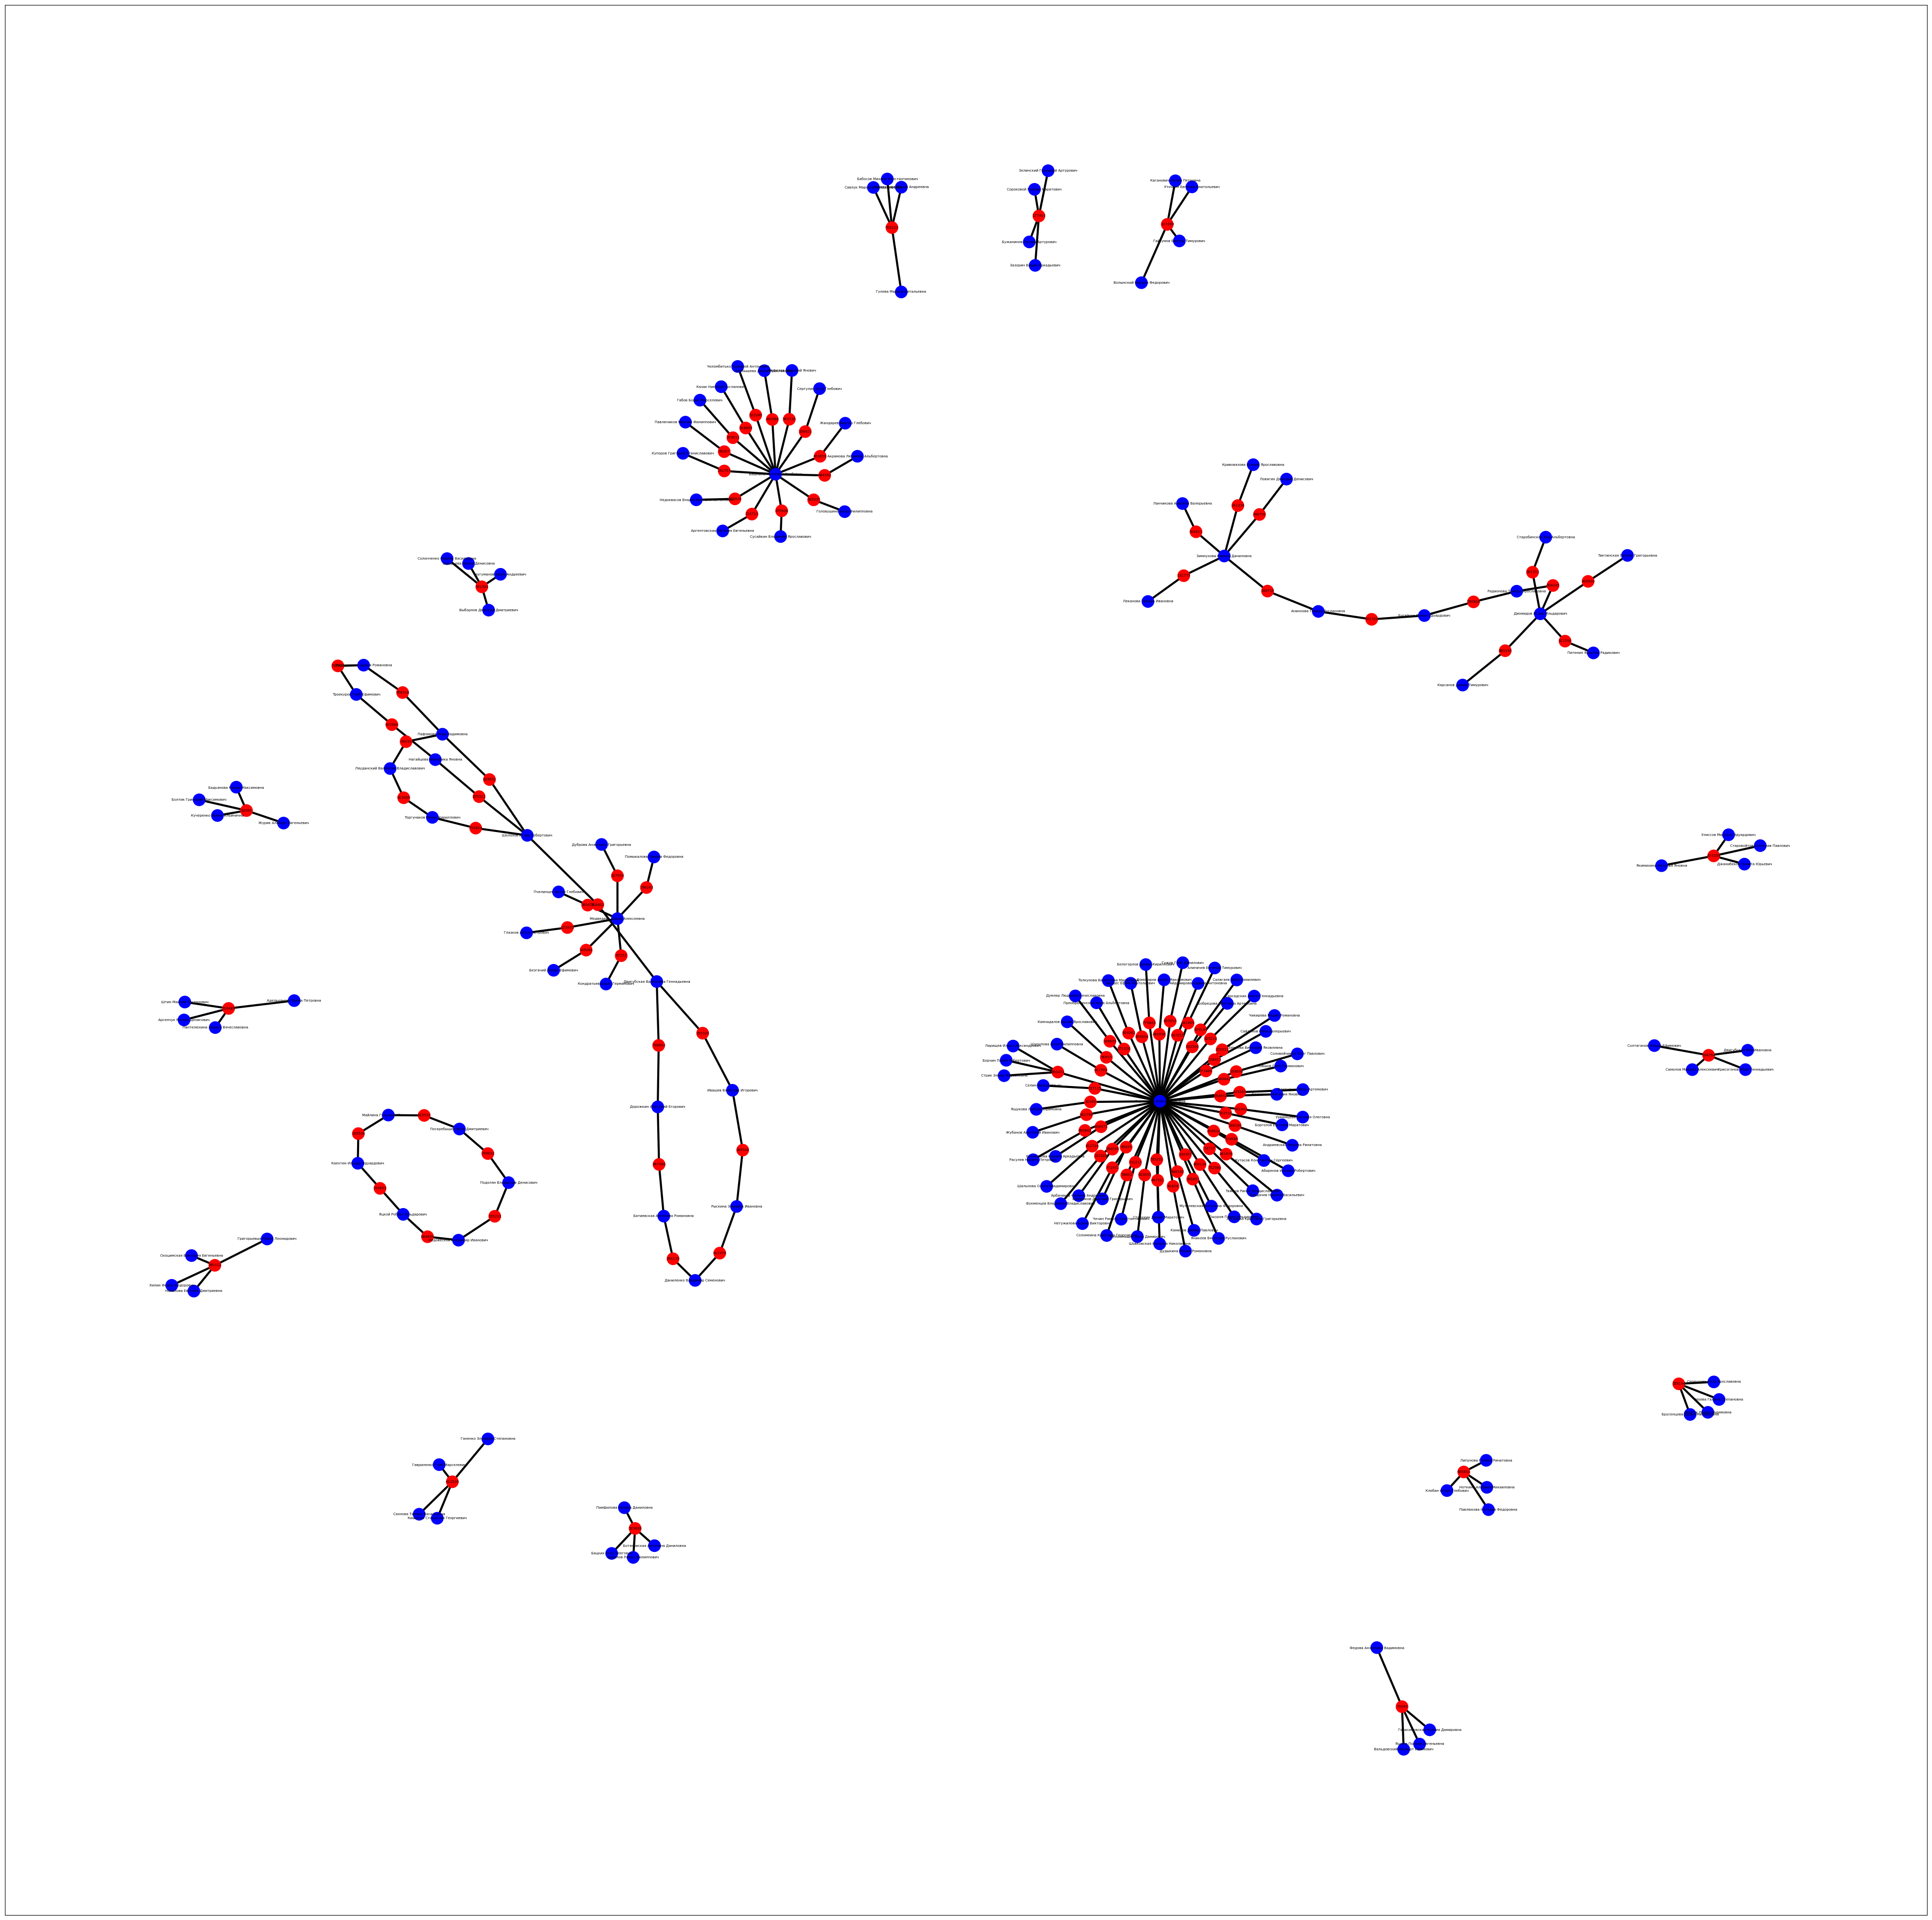

In [8]:
# Следующим шагом визуализировал граф только сложных сообщест, удалив из графа элементы, которые состоят в "простых" сообществах.
# Узлы "event" покрашены в красный цвет, узлы "participant" окрашены в синий цвет.
# Из графа заметил, что некоторые участники принимали участия во множестве встреч, также были встречи в которых участвовали 4 участника. 

nodes_to_remove = [k for k, v in result.items() if count[v] <= 3]
graph.remove_nodes_from(nodes_to_remove)

# Формируем цвета для каждого узла. Красные - встречи, синие - участники
color_map = []
for el in graph:
    if isinstance(el, int):
        color_map.append('r')
    else:
        color_map.append('b')

# Формируем словарь из сложных сообществ(под-графов), elem - номер сообщества, nodes - элементы сообщества
subgraphs = {}
for elem in set(result.values()):
    nodes = [node for node, community_id in result.items() if community_id == elem]
    subgraphs[elem] = graph.subgraph(nodes)
    
_, ax = plt.subplots(figsize=(50, 50))
networkx.draw_networkx(graph, ax=ax, node_size=300, width=3, font_size=5, node_color=color_map)